In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
stops = pd.read_csv('Data/google_transit/stops.txt', 
                 delimiter = ',' )

In [3]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,101,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,1,NaN
1,101N,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
2,101S,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
3,103,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,1,NaN
4,103N,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,0,103


In [21]:
len(stops['stop_id'].unique())

1503

There are 380 unique stops in the "stops.txt" dataset.

In [5]:
trips = pd.read_csv('Data/google_transit/trips.txt',
              delimiter = ',')

trips.head(10)

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,7,A20170625SUN,A20170625SUN_001150_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
1,7,A20170625SUN,A20170625SUN_006150_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R
2,7,A20170625SUN,A20170625SUN_012000_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
3,7,A20170625SUN,A20170625SUN_017650_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R
4,7,A20170625SUN,A20170625SUN_024000_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
5,7,A20170625SUN,A20170625SUN_029650_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R
6,7,A20170625SUN,A20170625SUN_035000_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
7,7,A20170625SUN,A20170625SUN_039800_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R
8,7,A20170625SUN,A20170625SUN_044100_7..S97R,34 ST - 11 AV,1,NaN,7..S97R
9,7,A20170625SUN,A20170625SUN_049050_7..N97R,FLUSHING - MAIN ST,0,NaN,7..N97R


In [6]:
stop_times = pd.read_csv('Data/google_transit/stop_times.txt',
                        delimiter = ',')

stop_times.head(10)


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,A20170625SUN_001150_7..S97R,00:11:30,00:11:30,701S,1,NaN,0,0,NaN
1,A20170625SUN_001150_7..S97R,00:14:00,00:14:00,702S,2,NaN,0,0,NaN
2,A20170625SUN_001150_7..S97R,00:15:30,00:15:30,705S,3,NaN,0,0,NaN
3,A20170625SUN_001150_7..S97R,00:16:30,00:16:30,706S,4,NaN,0,0,NaN
4,A20170625SUN_001150_7..S97R,00:17:30,00:17:30,707S,5,NaN,0,0,NaN
5,A20170625SUN_001150_7..S97R,00:19:00,00:19:00,708S,6,NaN,0,0,NaN
6,A20170625SUN_001150_7..S97R,00:20:00,00:20:00,709S,7,NaN,0,0,NaN
7,A20170625SUN_001150_7..S97R,00:21:00,00:21:00,710S,8,NaN,0,0,NaN
8,A20170625SUN_001150_7..S97R,00:22:30,00:22:30,711S,9,NaN,0,0,NaN
9,A20170625SUN_001150_7..S97R,00:24:30,00:24:30,712S,10,NaN,0,0,NaN


In [8]:
len(stop_times.stop_id.unique())

987

<h1> To Do </h1>

* Merge Stops and Stop Times
* Create a summary dataset that shows the time 
* Show distribution of this merged, summarized dataset.

<h4> Ambition </h4>

* Try to get a map visualization using the locations

<h4> Try to get a summary table of the stop_times to get a sense of the distribution of stops. </h4>

In [39]:
stop_times_aggregated = (stop_times.
                         groupby(['stop_id'],
                                 as_index= 'False').
                                 count().
                                 reset_index())

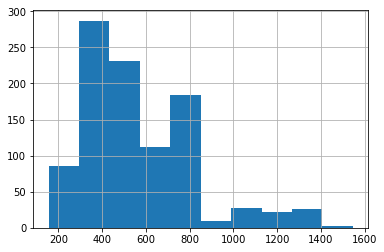

In [19]:
stop_times_aggregated['trip_id'].hist()

In [37]:
stop_times_aggregated.reset_index()

,stop_id,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,101N,513,513,513,513,0,513,513,0
1,101S,499,499,499,499,0,499,499,0
2,103N,513,513,513,513,0,513,513,0
3,103S,516,516,516,516,0,516,516,0
4,104N,513,513,513,513,0,513,513,0
5,104S,516,516,516,516,0,516,516,0
6,106N,513,513,513,513,0,513,513,0
7,106S,516,516,516,516,0,516,516,0
8,107N,518,518,518,518,0,518,518,0
9,107S,516,516,516,516,0,516,516,0


In [22]:
len(stop_times_aggregated)

987

In [42]:
stop_times_aggregated['total_trips'] = stop_times_aggregated['trip_id']

In [49]:
total_trips = stop_times_aggregated.loc(:,['stop_id','total_trips'])

SyntaxError: invalid syntax (<ipython-input-49-e478ef4d3fd6>, line 1)

<h4> How to merge two datasets with the same "keys" (unique identifiers) </h4>



In [43]:
merged_stop_data = stops.merge(stop_times_aggregated['total_trips'], on = 'stop_id', how = 'left')

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

In [41]:
merged_stop_data.sample(20)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,trip_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
989,G14S,NaN,Jackson Hts - Roosevelt Av,NaN,40.746644,-73.891338,NaN,NaN,0,G14,1312.0,1312.0,1312.0,1312.0,0.0,1312.0,1312.0,0.0
6,104,NaN,231 St,NaN,40.878856,-73.904834,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,633N,NaN,28 St,NaN,40.743070,-73.984264,NaN,NaN,0,633,608.0,608.0,608.0,608.0,0.0,608.0,608.0,0.0
1500,S31,NaN,St George,NaN,40.643748,-74.073643,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,221,NaN,3 Av - 149 St,NaN,40.816109,-73.917757,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524,724S,NaN,5 Av,NaN,40.753821,-73.981963,NaN,NaN,0,724,712.0,712.0,712.0,712.0,0.0,712.0,712.0,0.0
939,F32,NaN,Bay Pkwy,NaN,40.620769,-73.975264,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,A41S,NaN,Jay St - MetroTech,NaN,40.692338,-73.987342,NaN,NaN,0,A41,1123.0,1123.0,1123.0,1123.0,0.0,1123.0,1123.0,0.0
578,A18S,NaN,103 St,NaN,40.796092,-73.961454,NaN,NaN,0,A18,456.0,456.0,456.0,456.0,0.0,456.0,456.0,0.0
187,227N,NaN,Central Park North (110 St),NaN,40.799075,-73.951822,NaN,NaN,0,227,781.0,781.0,781.0,781.0,0.0,781.0,781.0,0.0
